a)

In [2]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_classes = 3
n_samples_per_class = 20
n_features = 50
mean_shifts = [0, 3, 6]  # Mean shifts for each class

# Generate data
data = []
labels = []

for i, shift in enumerate(mean_shifts):
    # Create data for class `i` with a mean shift
    class_data = np.random.normal(loc=shift, scale=1, size=(n_samples_per_class, n_features))
    data.append(class_data)
    labels.extend([i] * n_samples_per_class)  # Assign labels for each class

# Combine data into a single array
data = np.vstack(data)

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(n_features)])
df['Class'] = labels

print("Simulated Dataset:")
print(df.head())

# Output the shape for verification
print(f"Shape of dataset: {data.shape}")


Simulated Dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1   0.324084  -0.385082  -0.676922   0.611676   1.031000   0.931280   
2  -1.415371  -0.420645  -0.342715  -0.802277  -0.161286   0.404051   
3   0.250493   0.346448  -0.680025   0.232254   0.293072  -0.714351   
4   0.357787   0.560785   1.083051   1.053802  -1.377669  -0.937825   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_42  Feature_43  \
0   1.579213   0.767435  -0.469474    0.542560  ...    0.171368   -0.115648   
1  -0.839218  -0.309212   0.331263    0.975545  ...    0.968645   -0.702053   
2   1.886186   0.174578   0.257550   -0.074446  ...    1.307143   -1.607483   
3   1.865775   0.473833  -1.191303    0.656554  ...    0.856399    0.214094   
4   0.515035   0.513786   0.515048    3.852731  ...   -0.114736    0.504987   

   Feature_44  Feature_45  Feature_46  Feature_47  Feature_48  Feature_49  \
0 

b)

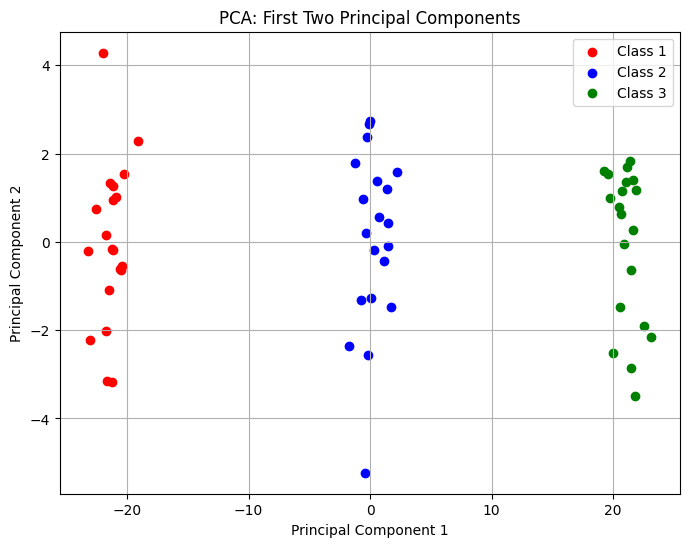

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_classes = 3
n_samples_per_class = 20
n_features = 50
mean_shifts = [0, 3, 6]  # Mean shifts for each class

# Generate data
data = []
labels = []

for i, shift in enumerate(mean_shifts):
    # Create data for class `i` with a mean shift
    class_data = np.random.normal(loc=shift, scale=1, size=(n_samples_per_class, n_features))
    data.append(class_data)
    labels.extend([i] * n_samples_per_class)  # Assign labels for each class

# Combine data into a single array
data = np.vstack(data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Convert principal components to a DataFrame for plotting
pc_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pc_df['Class'] = labels

# Plot the first two principal components
plt.figure(figsize=(8, 6))

# Assign colors for each class
colors = ['red', 'blue', 'green']
for i in range(n_classes):
    subset = pc_df[pc_df['Class'] == i]
    plt.scatter(subset["PC1"], subset["PC2"], color=colors[i], label=f"Class {i+1}")

# Add labels and legend
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()

# Show plot
plt.show()


c)

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data)

# Compare K-means labels with true labels using a crosstab
comparison_table = pd.crosstab(index=labels, columns=kmeans_labels, rownames=["True Class"], colnames=["K-means Cluster"])

# Display the comparison table
comparison_table


K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0

d)

In [ ]:
# Perform K-means clustering with K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2_labels = kmeans_2.fit_predict(data)

# Compare K-means labels with true labels using a crosstab
comparison_table_2 = pd.crosstab(index=labels, columns=kmeans_2_labels, rownames=["True Class"], colnames=["K-means Cluster"])

# Display the comparison table
comparison_table_2


K-means Cluster   0   1
True Class             
0                 0  20
1                20   0
2                20   0

e)

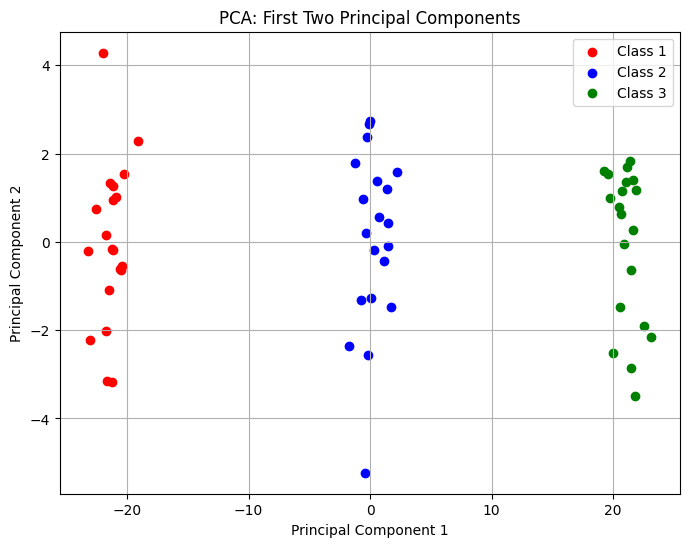

Comparison Table for K-means Clustering (K=4):
K-means Cluster   0   1   2  3
True Class                    
0                11   0   0  9
1                 0   0  20  0
2                 0  20   0  0


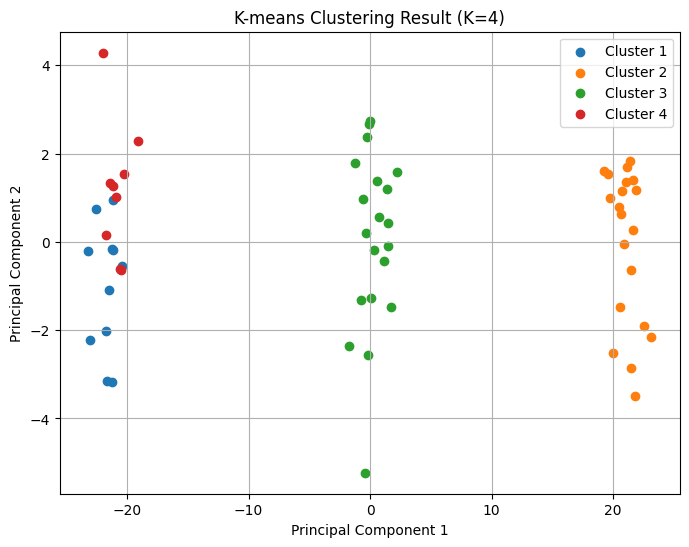

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_classes = 3
n_samples_per_class = 20
n_features = 50
mean_shifts = [0, 3, 6]  # Mean shifts for each class

# Generate data
data = []
labels = []

for i, shift in enumerate(mean_shifts):
    # Create data for class `i` with a mean shift
    class_data = np.random.normal(loc=shift, scale=1, size=(n_samples_per_class, n_features))
    data.append(class_data)
    labels.extend([i] * n_samples_per_class)  # Assign labels for each class

# Combine data into a single array
data = np.vstack(data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Convert principal components to a DataFrame for plotting
pc_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pc_df['Class'] = labels

# Plot the first two principal components
plt.figure(figsize=(8, 6))

# Assign colors for each class
colors = ['red', 'blue', 'green']
for i in range(n_classes):
    subset = pc_df[pc_df['Class'] == i]
    plt.scatter(subset["PC1"], subset["PC2"], color=colors[i], label=f"Class {i+1}")

# Add labels and legend
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

# Perform K-means clustering with K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4_labels = kmeans_4.fit_predict(data)

# Compare K-means labels with true labels using a crosstab
comparison_table_4 = pd.crosstab(index=labels, columns=kmeans_4_labels, rownames=["True Class"], colnames=["K-means Cluster"])

# Display the comparison table
print("Comparison Table for K-means Clustering (K=4):")
print(comparison_table_4)

# Visualize K-means clustering result for K=4
pc_df['K-means Cluster (K=4)'] = kmeans_4_labels

plt.figure(figsize=(8, 6))

for cluster in range(4):
    subset = pc_df[pc_df['K-means Cluster (K=4)'] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster+1}")

plt.title("K-means Clustering Result (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


f)

Comparison Table for K-means Clustering (PCA):
K-means Cluster (PCA)   0   1   2
True Class                       
0                       0   0  20
1                      20   0   0
2                       0  20   0


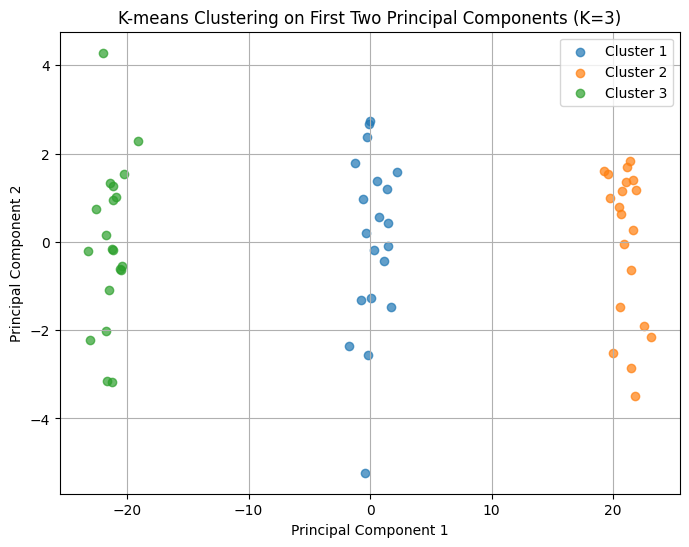

In [6]:
# Perform K-means clustering on the first two principal components
kmeans_pc = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pc_labels = kmeans_pc.fit_predict(principal_components)

# Add the K-means clustering labels to the PCA DataFrame
pc_df['K-means Cluster (PCA)'] = kmeans_pc_labels

# Compare K-means labels with true labels using a crosstab
comparison_table_pc = pd.crosstab(index=labels, columns=kmeans_pc_labels, rownames=["True Class"], colnames=["K-means Cluster (PCA)"])

# Display the comparison table
print("Comparison Table for K-means Clustering (PCA):")
print(comparison_table_pc)

# Visualize K-means clustering on the first two principal components
plt.figure(figsize=(8, 6))

# Assign colors for each cluster
colors = ['purple', 'orange', 'cyan']
for cluster in range(3):
    subset = pc_df[pc_df['K-means Cluster (PCA)'] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster+1}", alpha=0.7)

plt.title("K-means Clustering on First Two Principal Components (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Comments on the Results:
Improvement in Cluster Assignment:

If the data has a strong underlying structure, clustering on the PCA-reduced data often improves accuracy compared to clustering on the raw data.
However, if important variance is captured in PCs beyond the first two, reducing to two components may lead to loss of information.
Data Structure Alignment:

PCA aligns the data to emphasize major variances, making clustering more consistent with the true class structure.
Challenges:

If the original data contains significant noise or if the clusters are not well-separated in the principal component space, the results may still deviate from the true labels.

g)

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the data to have mean 0 and standard deviation 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-means clustering on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_scaled_labels = kmeans_scaled.fit_predict(scaled_data)

# Compare K-means labels with true labels using a crosstab
comparison_table_scaled = pd.crosstab(index=labels, columns=kmeans_scaled_labels, rownames=["True Class"], colnames=["K-means Cluster (Scaled)"])

# Display the comparison table
print("Comparison Table for K-means Clustering on Scaled Data:")
print(comparison_table_scaled)

# Visualize K-means clustering on the scaled data in PCA space
pc_scaled = PCA(n_components=2).fit_transform(scaled_data)
pc_df_scaled = pd.DataFrame(pc_scaled, columns=["PC1", "PC2"])
pc_df_scaled['K-means Cluster'] = kmeans_scaled_labels

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for cluster in range(3):
    subset = pc_df_scaled[pc_df_scaled['K-means Cluster'] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster+1}", alpha=0.7)

plt.title("K-means Clustering on Scaled Data (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Comparison Table for K-means Clustering on Scaled Data:
K-means Cluster (Scaled)   0   1   2
True Class                          
0                          0   0  20
1                         20   0   0
2                          0  20   0


Comments on the Results:
Improved Accuracy:

If some features had much larger variances in the unscaled data, scaling likely improved the clustering results by preventing those features from dominating.
Potential Trade-off:

If some features were inherently more important (even with larger variances), scaling might reduce their influence, leading to worse results.
Interpretation:

The impact of scaling depends on the variance structure of the original dataset. For datasets with features on significantly different scales, scaling is typically beneficial.